# End-to-end Machine Learning project on predicting housing prices

* A machine learning model that is trained on California Housing Prices dataset from the StatLib repository. 
* We are doing supervised learning here and our aim is to do predictive analysis
* During our journey we'll understand the important tools needed to develop a powerful ML model
* Our model will help us in predicting future housing prices. 
* We'll validate it against our test dataset

#### To do an end-to-end Machine Learning project we need to do the following steps

1. Understand the requirements of the business.
2. Acquire the dataset.
3. Visualize the data to understand it better and develop our intuition.
4. Pre-process the data to make it ready to feed to our ML model.
5. Try various models and train them. Select one that we find best.
6. Fine-tune our model by tuning hyper-parameters
7. Present your solution to the team.
8. Launch, monitor, and maintain your system.

#### 1. Understand the requirements of the business

We are enthusiastic data scientists and before starting we need to ask some fundamental questions

1. Why does our organisation need this predictive model?
    
   - possibly we are a real-estate firm and interested in investing in California
   - the organisation will use this data to feed another machine learning model
   - current process is good but manual and time consuming
   - our organisation wants an edge over competition
   - we are a consulting firm in the real-estate business and this data is valuable

2. We need to understand what are we doing at the root level?
 
   - We'll train our model on existing data so we are doing supervised learning
   - Since we need to predict housing prices we are doing regression
   - Ouput depends on many parameters so we are doing multivariate-regression
 

#### 2. Acquire the dataset

Let's get started.

1. Prepare a virtual environment
2. Activate it
3. Install the dependencies

veer@veer-MacBook:~$ mkdir ml-housing-project
veer@veer-MacBook:~$ cd ml-housing-project/
veer@veer-MacBook:~/ml-housing-project$ python -m venv venv
veer@veer-MacBook:~/ml-housing-project$ source venv/bin/activate
(venv) veer@veer-MacBook:~/ml-housing-project$ pip install --upgrade jupyter matplotlib numpy pandas scipy scikit-learn

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


In [2]:
housing = pd.read_csv('./housing.csv')

In [3]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. 
2. A blockgroup typically has a population of 600 to 3,000 people.
3. We will just call them “districts” for short.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### 3. Visualize the Data

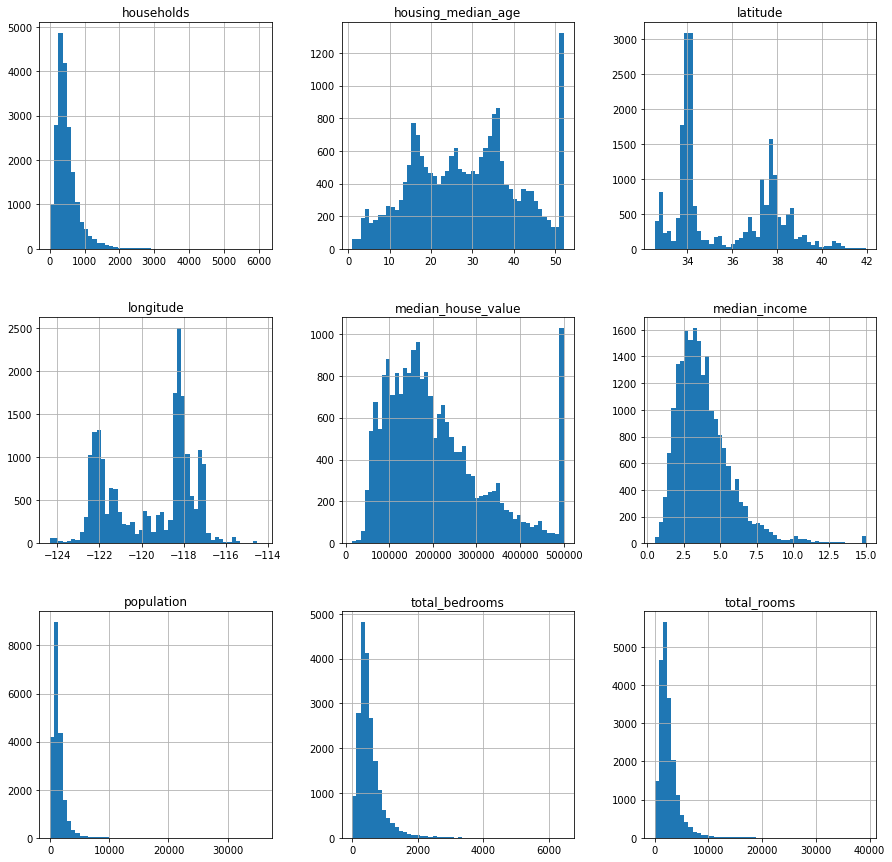

In [5]:
housing.hist(bins=50, figsize=(15,15))
plt.show()

Great! 

* We are seeing each feature of our dataset as a histogram.
* I want you to take a pen and paper and write down your some comment about each one
* Believe me mostly your insights would be better than mine
 

Done? Let's compare

* households - hmm, most districts have around 100-500 households. peak is around 4800
* housing median age - well, not very bell-shaped, at 35 and 15 are two peaks. are these years? max peak is at 50. does this mean major houses in each district are more than 50 years old?!?
* latitude - looks correct, at 34 and 37 degrees of latitude are major houses.
* longitude - the same, at -122 and -118 degrees are major houses
* median house value - hmm, this is what i need to predict. somewhat bell-shaped, at extreme right there is a surge, is y-axis dollars? does this mean most houses are above 500,000? 
* median income - very bell-shaped, good distribution, but is this income in dollars? There is no income above 15 so some capping has been done. most people have income between 2-5
* population - most districts have population below 3000
* bedrooms - hmm, we have got bedrooms for a district? looks like most districts have between 300-600 bedrooms
* total rooms - again similar to the previous two. most districts have around 3000 rooms

#### 4. Pre-process the data

Say some expert tells us that median income is a very important parameter to find out housing prices. We observe that the median income data is continous. So let's make it discrete


In [6]:
housing["income_cat"] = np.ceil(housing["median_income"]/ 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)



Now based on income categories, we'll split our entire data into 

* 80% for training our model
* 20% for testing our model

Sklearn makes it easy for us.

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

In [8]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

We need to remove the income category from our training and test datasets. let's do it by

In [9]:
strat_train_set.drop(["income_cat"], axis=1, inplace=True)
strat_test_set.drop(["income_cat"], axis=1, inplace=True)

Let's create a copy of our training data set and visualize it using a scatter plot

In [10]:
housing = strat_train_set.copy()

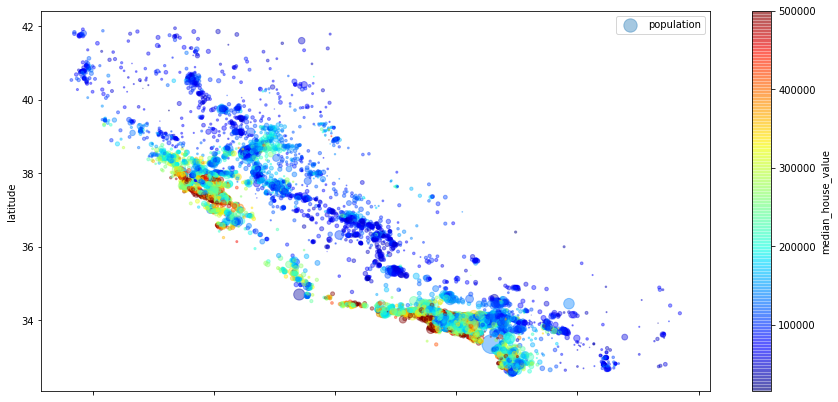

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))
plt.legend()

* The radius of each circle represents the district’s population (option s)
* The color represents the price (option c).
* We use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

#### Correlation

* also known as the Pearson coefficient
* its a value between +1 and -1
* +1 means two attributes are highly correlated
* 0 means two attributes are not at all correlated
* -1 means two attributes are inversely correlated
* the correlation coefficient only measures linear relationships

Let's find out if there is correlation between our attributes using scatter_matrix method

In [12]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcaafdaf9b0>,
      dtype=object)

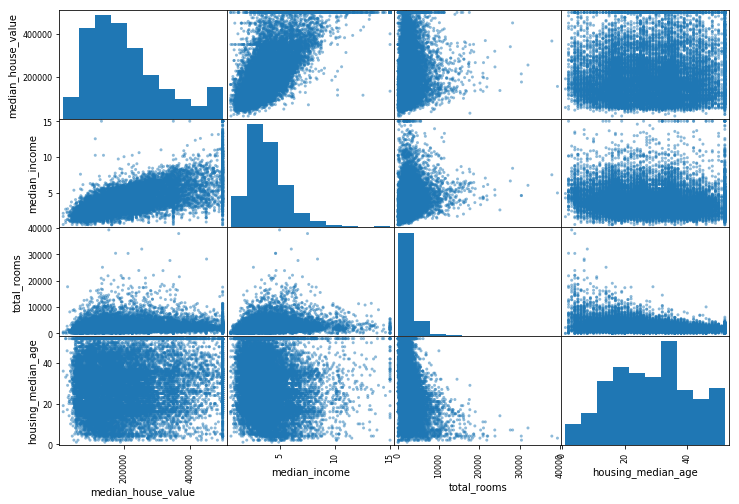

In [13]:
attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

We'll focus on the correlation between median house value and the median house income

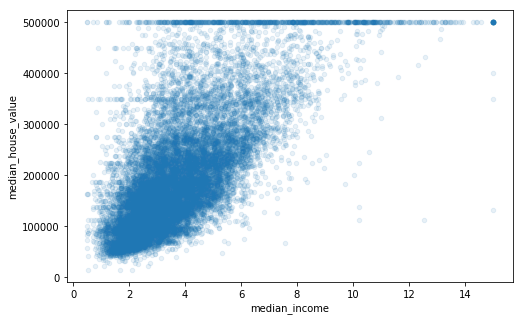

In [14]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1, figsize=(8,5))

* This is good correlation
* we see a horizontal line at the top which marks the upper capping
* some horizontal lines in the middle too
* We got a good idea about correlation in our dataset. Let's move on

In [15]:
housing.head(3)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN


* See these three attributes above? 
=> total_rooms, total_bedrooms, population

* They are for an entire district. It would be nice to find them for a household. Why?
* We are calculating per house price. Correct?
* So let's do that
* So basically we are deriving new attributes from existing attributes in our dataset

In [16]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [17]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974


Hmmm. Nice! I like the way things are shaping up. 

Now
1. let's find out the correlation of our entire dataset and 
2. find out which one is most related to median house value. 

Like this...

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Study this for a moment or two and make some notes. When ready let's move on

### Data Cleaning

Let's create a fresh training dataset and make some concepts clear


* housing - this is the chunk we'll feed to our model to learn
* housing_labels - this is our target price in our training dataset which our model should learn



In [20]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

Do you remember in the start our total_bedrooms had some missing values?

We can fix this in 3 ways
1. remove the instances(rows) of missing values
2. remove the entire attribute
3. set missing value to some value like zero, median or mean


We'll take option 3 and put in the median value using the `SimpleImputer` method
like this

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [22]:
housing_num = housing.drop('ocean_proximity', axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [23]:
# imputer.fit(housing_num)

In [24]:
# imputer.statistics_

In [25]:
# housing_num.median()

In [26]:
# X = imputer.transform(housing_num)

In [27]:
# housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### Pipelines

In machine learning we repeat certain procedures like 

    - data cleaning and removing null values
    - deriving attributes
    - transforming data
    - processing numerical and categorial data separately

To save time we can join these chunks and form a solid pipeline!

So anytime if 

    - there are changes
    - we want to play around with our model
    - if input data has changed
    - we want to try different things 
  
  we just run our pipeline. Cool isn't it?
  
This is one of the most difficult part in our project.

To achieve this we will

     - define the individiual components of the pipeline
     - combine them using Feature Union
    
So let's get our hands dirty

In [28]:
from sklearn.base import BaseEstimator, TransformerMixin

In [29]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [30]:
# this component gives us the flexibility to add extra attributes to our pipeline

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,

                         
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
                

In [31]:
# this component allows us to select entire or partial dataframe
# or in simpler words we can tell which attributes we want in our pipeline

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

Label Binarizer converts
 
 - text to integers
 - integers to one hot vectors
 - think of one hot vectors as an array which has all 0's but only one 1!


In [32]:
class MyLabelBinarizer(TransformerMixin):
    
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    
    def transform(self, x, y=0):
        return self.encoder.transform(x)


Great! 

- Our individual components are done! 
- Let's separate our numerical and categorical attributes and then
- Let's define our final pipeline like this

In [33]:
# housing_num = housing.drop('ocean_proximity', axis=1)

In [34]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [35]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer


In [37]:
# our numerical pipeline

num_pipeline = Pipeline([
                    ('selector', DataFrameSelector(num_attribs)),
                    ('imputer', SimpleImputer(strategy="median")),
                    ('attribs_adder', CombinedAttributesAdder()),
                    ('std_scaler', StandardScaler()),
                ])

In [38]:
# our categorical pipeline

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', MyLabelBinarizer()),
])


In [39]:
# our full pipeline

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [40]:
housing_prepared = full_pipeline.fit_transform(housing)

In [41]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

Fantastic!

We have come a long way. So where are we now in our project?
 
 - we acquired our dataset
 - studied and understood it
 - visualized it
 - split it into train and test
 - made our pipelines
 - transformed our housing data
 
So now we have our data all ready and prepared to be fed to an ML model



### 5. Try various ML models and train them

So which model to chose? 

- Well this will come by practice and I am equally confused as you.
- Lets do 3 popular models

### Linear Regression with K-fold cross validation


In K-fold cross validation, say we chose k=10 then
* it divides our training data into 10 folds
* trains and evaluates a decision tree model 10 times
* result is an array of 10 scores

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [65]:
lin_reg = LinearRegression()

In [112]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

In [123]:
# find root mean squared error, scores is an array of negative numbers
rmse_scores = np.sqrt(-scores)

In [124]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  69052.46136345083 
Standard Deviation: 2731.6740017983507


Ok. We got some output.

But how do we know how good is this model?
 - by finding the root mean squared error between predictions and actuals
 - It measures the standard deviation of the errors the system makes in its predictions. 
 - For example, an RMSE of 50,000 means that about 68% of the system’s predictions fall within 50,000 of the actual value
 - and about 95% of the predictions fall within 100,000 of the actual value.

#### Hmmm....What conclusions can we draw?

* note that our median_housing_values lie with 120,000 and 265,000
* so a typical prediction error of $69,052 with ±2731 is not very satisfying. 
* This is an example of a model underfitting the training data. 
* When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough

### Decision Tree Regressor with K-fold cross validation


In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [97]:
tree_reg = DecisionTreeRegressor()

In [98]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

In [99]:
# see the 10 scores
scores

array([-4.82264674e+09, -4.70550343e+09, -5.25677730e+09, -4.74980731e+09,
       -4.97593431e+09, -5.56426337e+09, -5.08232342e+09, -5.12706705e+09,
       -5.92716018e+09, -4.95603720e+09])

In [100]:
# find root mean squared error
rmse_scores = np.sqrt(-scores)

In [111]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  71487.98628461102 
Standard Deviation: 2493.9620863664845


#### Conclusion

* We have error of 71487 with ±2493.
* Our decision tree model is performing a little worse than our linear regression model

Let's move on

### Ensemble Learning - Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor


In [117]:
forest_reg = RandomForestRegressor()

In [118]:
forest_reg.fit(housing_prepared, housing_labels)

/home/veer/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [119]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)

In [120]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [122]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  52607.95655454829 
Standard Deviation: 1734.3136777506847


#### Conclusion

* We have prediction error of 52608 with +/- 1734
* Ensemble learning with Random Forest looks very promising and performs the best out of the three
* Building a model on top of other model is called Ensemble learning
* We should save data from all three models for our reference



### 6. Fine tune our model with Hyper parameters


* We can do optimization on our model by tweaking Hyper-parameters
* Think of hyper parameters as "knobs" that you turn to optimize outpu
* We can do it manually but we'll use an automatic scikit learn GridSearchCV tool for this
* We'll apply it on our RandomForest model

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

* In the first row of param_grid we are saying to try 3 X 4 = 12 combinations
* In the second row we are saying to try 2 X 3 = 6 combinations with bootstrap false
* So in all we do 12 + 6 = 18 combinations
* We'll do a cross-validation(cv) of 5 folds. See below

In [130]:
forest_reg = RandomForestRegressor()

In [131]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

In [132]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [133]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

See the underscore in the above variable?
 - it means we want to see the values the model learnt or found
 - try pressing tab for autocompletion and you'll find a lot many
 - now lets try to visualize this a bit

In [134]:
cvres = grid_search.cv_results_

In [150]:
print("{}\t\t {}\n".format('Mean Score','Parameters'))

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    x = np.sqrt(-mean_score)
    y = params
    print("{:.2f}\t {}".format(x, y))

Mean Score		 Parameters

64031.76	 {'max_features': 2, 'n_estimators': 3}
55308.09	 {'max_features': 2, 'n_estimators': 10}
52953.88	 {'max_features': 2, 'n_estimators': 30}
58973.31	 {'max_features': 4, 'n_estimators': 3}
52930.84	 {'max_features': 4, 'n_estimators': 10}
50654.20	 {'max_features': 4, 'n_estimators': 30}
58606.54	 {'max_features': 6, 'n_estimators': 3}
51876.35	 {'max_features': 6, 'n_estimators': 10}
50120.91	 {'max_features': 6, 'n_estimators': 30}
59413.06	 {'max_features': 8, 'n_estimators': 3}
52160.58	 {'max_features': 8, 'n_estimators': 10}
50048.60	 {'max_features': 8, 'n_estimators': 30}
62587.73	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54441.04	 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59626.13	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52790.46	 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59010.80	 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51351.47	 {'bootstrap': False, '

- look for the minimum value
- I'm getting at 50,048 with max_features=8, n_estimators=30
- without fine-tuning we had got 52,607 so there has been improvement

#### Great we've successfully fine-tuned our model!

### Evaluate your model on the test set

* We have a system that performs sufficiently well.
* Now is the time to evaluate the final model on the test set.
* We get the predictors and the labels from our test set, run our full_pipeline to transform the data 
* Call transform(), not fit_transform(), and evaluate the final model on the test set


Let's get started

In [151]:
final_model = grid_search.best_estimator_

In [153]:
X_test = strat_test_set.drop("median_house_value", axis=1)

In [154]:
y_test = strat_test_set["median_house_value"].copy()

In [155]:
# we prepare the data
X_test_prepared = full_pipeline.transform(X_test)

In [156]:
# do the prediction
final_predictions = final_model.predict(X_test_prepared)

In [157]:
# find mean square error
final_mse = mean_squared_error(y_test, final_predictions)

In [158]:
# find root mean square error
final_rmse = np.sqrt(final_mse)

In [159]:
final_rmse

48468.41497285781

### Present your solution

How to present your findings is totally upto you as a data scientist. However some guidelines are

- what was your approach and why did you chose it
- any assumptions that you made in your process
- what are your system’s limitations
- document everything
- create nice presentations with clear visualizations
- make simple and powerful one line conclusions like

    - "the median income is the number one predictor of housing prices"
    - "There is a good correlation between median income and median house value."
    

### Launch, Monitor, and Maintain Your System

Say we get an approval for our model for production. Now we need to remember
* this model will become obsolete with time
* so we need to write some code to maintain it
* with time we also need to check the input data quality
* maybe we'll make fresh models on newer data

I think we'll end our project here but this is just the start.


### Congratulations! You  just implemented an full fledged end-to-end machine learning project